<a href="https://colab.research.google.com/github/JxxHxxx/Ubion---TimeSeriesPrediction/blob/main/TimeSeriesPredictionAAPL_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 8.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=08cb5d0e530f8f6b9cd35c7a75ec42ada4ea3a77eb4956f35bd7303ebead13c8
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [18]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import seaborn as sns 
%matplotlib inline

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_plotly, plot_forecast_component_plotly, plot_components_plotly, plot_seasonality_plotly

from fbprophet.diagnostics import performance_metrics, rmse
from google.colab import drive

In [21]:
df_AAPL = yf.download('AAPL', start = '2010-08-31', end = '2021-08-31')
df_AAPL.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


# 애플 역사적 종가 데이터

In [22]:
fig = px.line(df_AAPL, x = 'Date' ,y = 'Close', title = 'Apple Close Price History')
fig.show()


In [23]:
df_AAPL = yf.download('AAPL', start = '2017-08-31', end = '2021-08-31')
df_AAPL.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [24]:
df_AAPL = df_AAPL[['Date','Close']]
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])
df_AAPL.columns = ['ds','y']

# APPLE 주가 예측, Prophet 모델 적용


In [29]:
model = Prophet(daily_seasonality = True, weekly_seasonality=False)
model.fit(df_AAPL)
future = model.make_future_dataframe(periods=1 * 14, freq='W')
forecast = model.predict(future)

In [31]:
fig = plot_plotly(model, forecast,xlabel = 'Date', ylabel = 'Close Price', figsize=(1600, 1000))

fig.add_trace(go.Scatter(x = forecast['ds'],
                         y = forecast['yhat_upper'],
                         name = 'Predict_upper'))

fig.add_trace(go.Scatter(x = forecast['ds'],
                         y = forecast['yhat_lower'],
                         name = 'Predict_lower'))

fig.update_layout(title_text= "Apple Close Price Forecast",
                  title_font_color ='red')

py.iplot(fig)

In [32]:
chg_point = model.changepoints.reset_index()
deltas = model.params['delta'].mean(0)

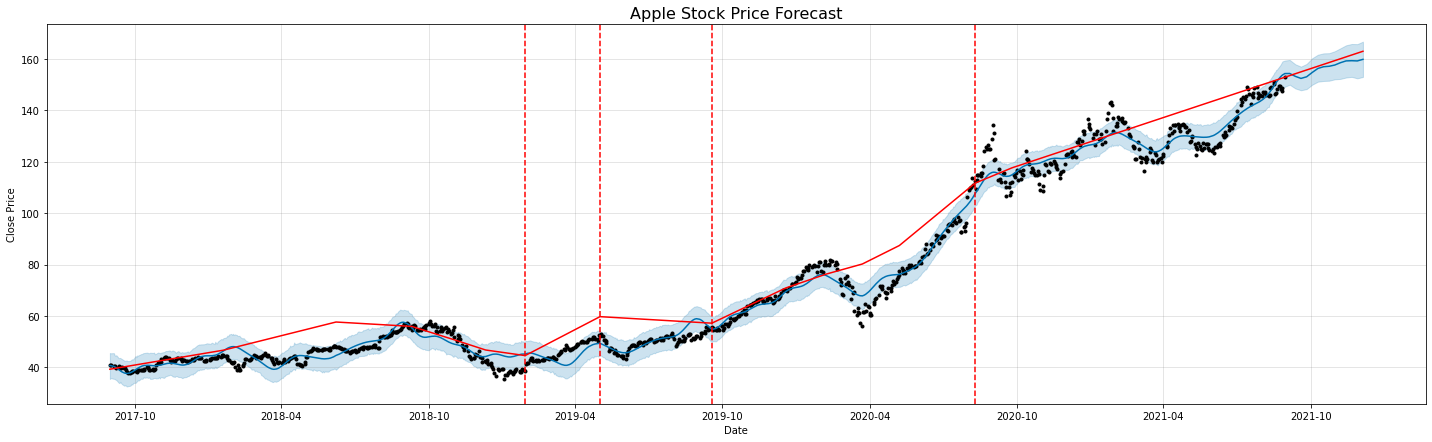

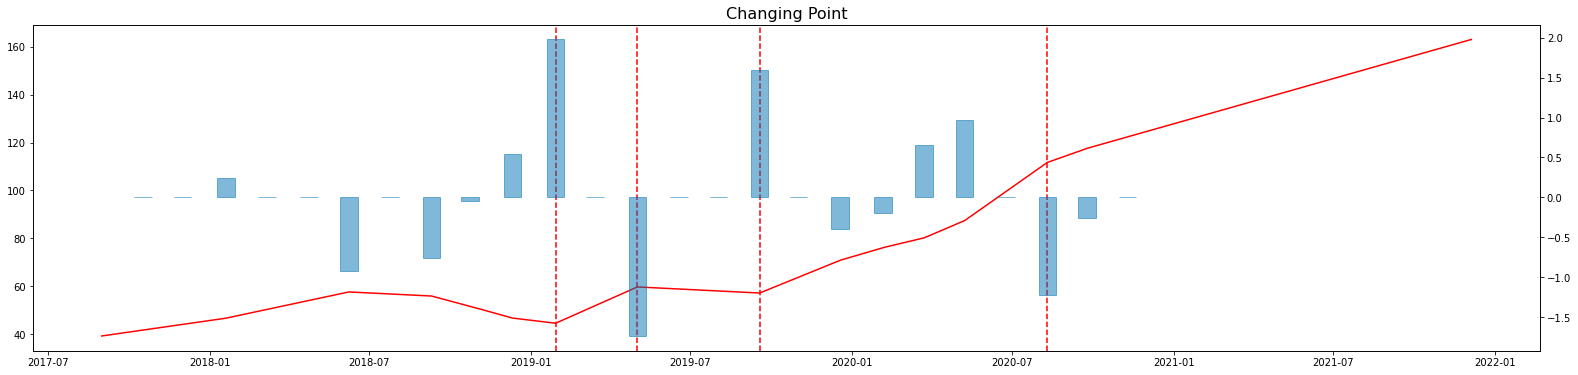

In [33]:
fig = model.plot(forecast, figsize=(20,6))
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=1)

ax = fig.add_subplot(111)
ax.set_title('Apple Stock Price Forecast', fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

plt.show()

fig, ax = plt.subplots(1,1, figsize=(27,6))  
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=1)
ax.set_title('Changing Point',fontsize = 16)
ax2 = ax.twinx()
ax2.bar(chg_point['ds'], deltas, facecolor='#0072B2', edgecolor='#0072B2',width= 20, alpha=0.5)

plt.show()

# Trend, Seasonal 해석
# [애플의 분기별 어닝데이터](https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue)

In [34]:
plot_seasonality_plotly(model,'yearly', figsize=(900,600))

In [35]:
plot_forecast_component_plotly(model, forecast, 'trend',figsize=(900,600))

In [ ]:
y_pred = forecast['yhat'][0:1006]
y_data = df_AAPL['y']

In [ ]:
print(y_pred.shape, y_data.shape)

(1006,) (1006,)


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_data,y_pred)

15.461392043549466